In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [6]:
ds = xr.open_dataset("zarr-stores/loss.nc")
ds.load()

<xarray.Dataset> Size: 1kB
Dimensions:        (optim_step: 16, var_index: 7, var_names: 7)
Coordinates:
  * optim_step     (optim_step) int64 128B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
  * var_index      (var_index) int64 56B 0 1 2 3 4 5 6
  * var_names      (var_names) <U7 196B 'ugrd10m' 'vgrd10m' 'tmp' ... 'SSH' 'so'
Data variables:
    loss           (optim_step) float32 64B 4.466 4.822 4.475 ... 3.669 3.89
    loss_valid     (optim_step) float32 64B 4.716 4.695 4.237 ... 3.833 3.71
    loss_by_var    (var_index, optim_step) float32 448B 3.336 3.157 ... 0.9393
    learning_rate  (optim_step) float64 128B nan nan nan nan ... nan nan nan nan
Attributes:
    batch_size:  16

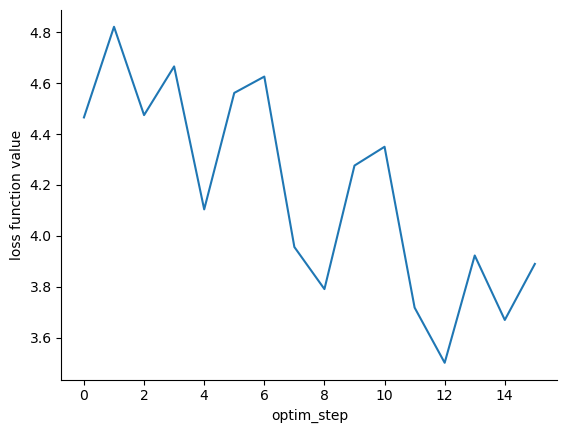

In [3]:
fig, ax = plt.subplots()
ds.loss.plot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.savefig("loss.png")

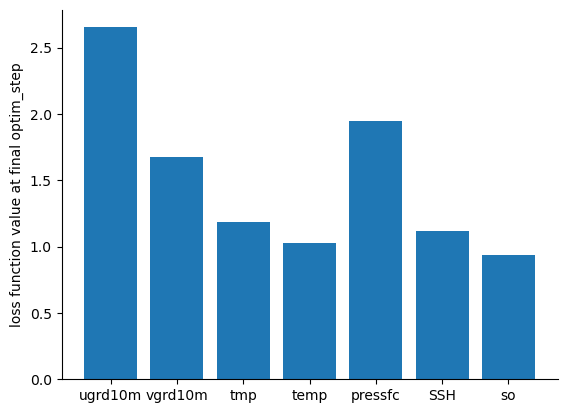

In [4]:
fig, ax = plt.subplots()
plt.bar(
    x=ds.var_index,
    height=ds.loss_by_var.isel(optim_step=-1),
)

ax.set(
    xticks=ds.var_index.values,
    xticklabels=ds.var_names.values,
    ylabel="loss function value at final optim_step",
);

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)